# Model Accuracy

This notebook discusses how to asses model accuracy for simple linear resgression. We will learn about how to

- Assess the accuracy of the coefficient estimates

- Assess the accuracy of the Model


## Assessing the Accuracy of the Coefficient Estimates

Recall from the previous class, we have a data set $\{(X_i, y_i)\ :\ i = 1, ..., p\}$. We assume the true relationship between $X_i$ and $y_i$ is

$$ y = f(X) + \epsilon $$

where $\epsilon$ is a mean-zero error term (typically assume that the error term is independent of X). If $f$ is assumed to be linear, the model is:

$$ Y = \beta_0 + \beta_1X + \epsilon. $$

Here, $\beta_0$ is the intercept (expected $y$ when $X = 0$) and $\beta_1$  is the slope (average change in $y$ for a one-unit change in $X$). The error term accounts for deviations from this simple model, including non-linearity, omitted variables, and measurement errors. We assume the error term is independent of $X$.

This model defines __the population regression line__, which is the best linear approximation to the true relationship between X and Y. The least squares approach chooses $ \hat{\beta}_0 $ and $ \hat{\beta}_1 $ to minimize the __the residual sum of squares (RSS)__:

$$ \text{RSS} = (y_1 - \hat{\beta}_0 - \hat{\beta}_1 x_1)^2 + (y_2 - \hat{\beta}_0 - \hat{\beta}_1 x_2)^2 + \cdots + (y_n - \hat{\beta}_0 - \hat{\beta}_1 x_n)^2 $$

we saw that the minimizers are:

$$ \hat{\beta}_1 = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

$$ \hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x} $$


At first, the difference between the population regression line and the least squares line might seem confusing, especially with just one data set. This is similar to using sample data to estimate population parameters. For example, the sample mean $\bar{y}$ estimates the population mean $\mu$; while $\bar{y}$ may not exactly equal $\mu$, it generally provides a good estimate.


In linear regression, the least squares line approximates the true population regression line. The coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$ are estimated from the data, while the true coefficients are $\beta_0$ and $\beta_1$. Although $\hat{\beta}_0$ and $\hat{\beta}_1$ may not exactly match $\beta_0$ and $\beta_1$, averaging over many data sets will make these estimates very close to the true values.


In [ ]:
## Needed Libraries

## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns


## LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample
import statsmodels.api as sm

## This sets the plot style
## to have a grid on a white background (for readability of visualizations)
sns.set_style("whitegrid")

In [ ]:
# This generates data that look line a line
x = np.linspace(-5, 5, 75) ## Domain of the line
y = 2 * x + 3 + 2 * np.random.randn(75)  ## Linear relationship with added random noise

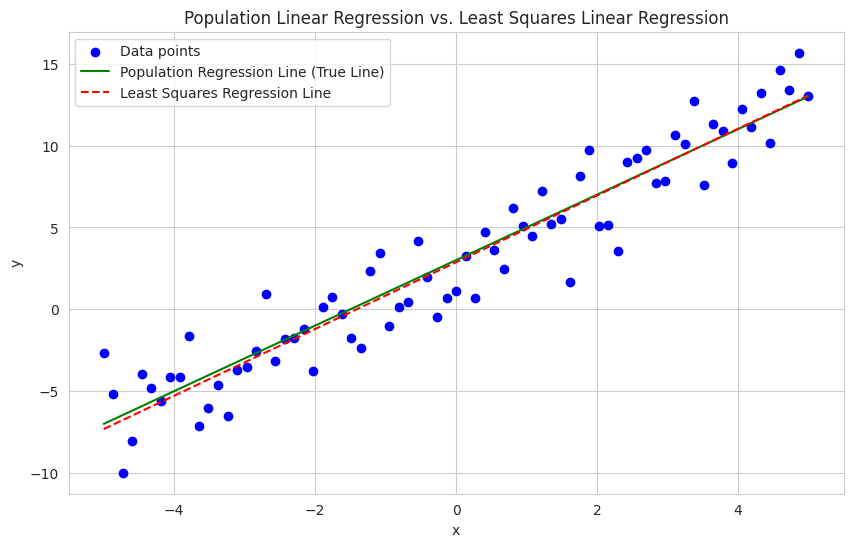

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate the data
x = np.linspace(-5, 5, 75)
y = 2 * x + 3 + 2 * np.random.randn(75)

# Calculate the least squares linear regression line
# We need to fit the data to the model y = mx + b

# Compute the coefficients
A = np.vstack([x, np.ones(len(x))]).T
m, b = np.linalg.lstsq(A, y, rcond=None)[0]

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data points')

# Plot the population regression line (the true line used to generate data)
x_line = np.linspace(-5, 5, 100)
y_line = 2 * x_line + 3
plt.plot(x_line, y_line, color='green', label='Population Regression Line (True Line)')

# Plot the least squares regression line
y_fit = m * x_line + b
plt.plot(x_line, y_fit, color='red', linestyle='--', label='Least Squares Regression Line')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Population Linear Regression vs. Least Squares Linear Regression')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


### How far off that single estimate of the true relationship will be?




What if we dont have access to many datasets? A single data set might lead to a substantial underestimate or overestimate of the true relationship.
In general, we answer this question by computing __the standard error of that single estimate__.

Recall that if we estimate the population mean $ \mu $ of a random variable $ Y $. The accuracy of the sample mean $ \hat{\mu} $ as an estimate of $ \mu $ is measured by its standard error $ \text{SE}(\hat{\mu}) $, given by:

$$ \text{SE}(\hat{\mu}) = \frac{\sigma}{\sqrt{n}} $$

where $ \sigma $ is the standard deviation of $ Y $. The standard error indicates the average difference between $ \hat{\mu} $ and $ \mu $, decreasing as the sample size $ n $ increases.

Similarly, the standard errors for regression coefficients $ \hat{\beta}_0 $ and $ \hat{\beta}_1 $ are:

$$ \text{SE}(\hat{\beta}_0) = \sqrt{\frac{\sigma^2}{n} \left(1 + \frac{\bar{x}^2}{\sum (x_i - \bar{x})^2}\right)}, \quad  \text{SE}(\hat{\beta}_1) = \frac{\sigma}{\sqrt{\sum (x_i - \bar{x})^2}} $$

where $\sigma^2$ is the variance of the errors ${\epsilon}_i$, which are assumed to have common variance and be uncorrelated.



A 95% confidence interval for $ \beta_1 $ is approximately:

$$ \hat{\beta}_1 \pm 2 \cdot \text{SE}(\hat{\beta}_1) $$

indicating the range within which the true $ \beta_1 $ is likely to lie with 95% probability.

Notice that $ \text{SE}(\hat{\beta}_1) $ is smaller when the $ x_i $ are more spread out, giving us more leverage to estimate the slope. If $ \bar{x} $ were zero, $ \text{SE}(\hat{\beta}_0) $ would be the same as $ \text{SE}(\hat{\mu}) $. Typically, $ \sigma^2 $ is unknown and estimated from the data by what is knowon as _the residual standard error:_

$$ \text{RSE} = \frac{\text{RSS}}{n - 2} $$

Here the $\text{RSS} = $

When $ \sigma^2 $ is estimated, we should write $ \text{SE}(\hat{\beta}_1) $ but will drop the extra "hat" for simplicity.


Strictly speaking, when $ \sigma^2 $ is estimated from the data, we should write $ \text{SE}(\hat{\beta}_1) $ to indicate that an estimate has been made, but for simplicity, we will drop this extra "hat".

indicating the range within which the true $ \beta_1 $ is likely to lie with 95% probability.


__How to interpet?__
For the advertising data, a 95% confidence interval for $ \beta_0 $ of $[6.130, 7.935]$ indicates that, on average, sales will be between 6,130 and 7,935 units without any advertising. A 95% confidence interval for $ \beta_1 $ of $[0.042, 0.053]$ suggests that for each $1,000 increase in television advertising, sales will increase by an average of 42 to 53 units.



### Group Activity

For our simulated data, find the 95% confidence intervals for $ \beta_0 $ and $ \beta_1 $. Interpret these results.

In [ ]:
### you code:

In [ ]:
# Reshape x for sklearn
X = x.reshape(-1, 1)

# Fit the model
model = LinearRegression().fit(X, y)

# Extract coefficients
beta_1 = model.coef_[0]
beta_0 = model.intercept_

# Predictions
y_pred = model.predict(X)

# Residuals
residuals = y - y_pred

# RSS
RSS = np.sum(residuals**2)

# Degrees of freedom
n = len(x)
df = n - 2

# Mean squared error (MSE)
MSE = RSS / df

# Variance of beta_1 and beta_0
x_mean = np.mean(x)
x_var = np.sum((x - x_mean)**2)

var_beta_1 = MSE / x_var
var_beta_0 = MSE * (1/n + x_mean**2 / x_var)

# Standard errors
SE_beta_1 = np.sqrt(var_beta_1)
SE_beta_0 = np.sqrt(var_beta_0)

# 95% Confidence Intervals
from scipy.stats import t

t_value = t.ppf(0.975, df)  # 95% confidence interval

CI_beta_1 = [beta_1 - t_value * SE_beta_1, beta_1 + t_value * SE_beta_1]
CI_beta_0 = [beta_0 - t_value * SE_beta_0, beta_0 + t_value * SE_beta_0]

print(f"95% Confidence Interval for beta0: {CI_beta_0}")
print(f"95% Confidence Interval for beta1: {CI_beta_1}")



95% Confidence Interval for beta0: [2.4277812250239994, 3.314415108077801]
95% Confidence Interval for beta1: [1.88615647291695, 2.189227213879615]


To calculate the 95% confidence intervals for $ \beta_0 $ and $ \beta_1 $ using the formula from above, follow these steps:

1. **Fit the Linear Model Using `scikit-learn`:**

   ```python
   import numpy as np
   import pandas as pd
   from sklearn.linear_model import LinearRegression
   from sklearn.metrics import mean_squared_error

   # Generate data
   np.random.seed(0)  # For reproducibility
   x = np.linspace(-5, 5, 75)  # Domain of the line
   y = 2 * x + 3 + 2 * np.random.randn(75)  # Linear relationship with added random noise

   # Fit the model
   X = x.reshape(-1, 1)
   model = LinearRegression().fit(X, y)

   beta_1 = model.coef_[0]
   beta_0 = model.intercept_
   ```

2. **Calculate Standard Errors and Confidence Intervals:**

   First, calculate the residual sum of squares (RSS) and the standard errors of the coefficients.

   ```python
   # Predictions
   y_pred = model.predict(X)

   # Residuals
   residuals = y - y_pred

   # RSS
   RSS = np.sum(residuals**2)

   # Degrees of freedom
   n = len(x)
   df = n - 2

   # Mean squared error (MSE)
   MSE = RSS / df

   # Variance of beta_1 and beta_0
   x_mean = np.mean(x)
   x_var = np.sum((x - x_mean)**2)

   var_beta_1 = MSE / x_var
   var_beta_0 = MSE * (1/n + x_mean**2 / x_var)

   # Standard errors
   SE_beta_1 = np.sqrt(var_beta_1)
   SE_beta_0 = np.sqrt(var_beta_0)

   # 95% Confidence Intervals
   from scipy.stats import t

   t_value = t.ppf(0.975, df)  # 95% confidence interval

   CI_beta_1 = [beta_1 - t_value * SE_beta_1, beta_1 + t_value * SE_beta_1]
   CI_beta_0 = [beta_0 - t_value * SE_beta_0, beta_0 + t_value * SE_beta_0]

   print(f"95% Confidence Interval for β0: {CI_beta_0}")
   print(f"95% Confidence Interval for β1: {CI_beta_1}")
   ```

__Interpretation:__

- **95% Confidence Interval for $ \beta_0 $:** This range shows where we expect the true intercept of the line to be with 95% confidence. For example, if the interval is $ [2.5, 3.5] $, it means we are 95% confident that the true intercept $ \beta_0 $ lies between 2.5 and 3.5.

- **95% Confidence Interval for $ \beta_1 $:** This interval shows where we expect the true slope of the line to be with 95% confidence. For example, if the interval is $ [1.8, 2.2] $, it means we are 95% confident that the true slope $ \beta_1 $ lies between 1.8 and 2.2.

### Hypothesis Tests on the Coefficients.

Standard errors can also be used to perform hypothesis tests on the coefficients. To perform hypothesis tests on the coefficients, we test:

- **Null Hypothesis ($H_0$):** $ \beta_1 = 0 $ (No relationship between $ X $ and $ Y $)
- **Alternative Hypothesis ($H_a$):** $ \beta_1 \neq 0 $ (There is a relationship between $ X $ and $ Y $)

We determine if $ \hat{\beta}_1 $ is significantly different from zero using its standard error ($ SE(\hat{\beta}_1) $). We compute the t-statistic:

$$ t = \frac{\hat{\beta}_1}{SE(\hat{\beta}_1)} $$

If $ SE(\hat{\beta}_1) $ is small, even a small $ \hat{\beta}_1 $ may indicate a significant relationship. Conversely, a large $ SE(\hat{\beta}_1) $ means $ \hat{\beta}_1 $ must be large to reject $ H_0 $.

The t-statistic follows a t-distribution with $ n - 2 $ degrees of freedom. The p-value, the probability of observing a t-statistic as extreme as $ |t| $ under $ H_0 $, helps assess significance. A small p-value (e.g., < 0.05) suggests rejecting $ H_0 $, indicating a significant relationship.

For example, in the advertising data:

- **Coefficients:**
  - Intercept: $ \hat{\beta}_0 = 7.0325 $ (Std. Error: 0.4578)
  - TV Budget: $ \hat{\beta}_1 = 0.0475 $ (Std. Error: 0.0027)

- **t-Statistics:**
  - Intercept: 15.36
  - TV Budget: 17.67

- **p-values:** Both are < 0.0001.

These high t-statistics and low p-values indicate that both $ \beta_0 $ and $ \beta_1 $ are significantly different from zero. Thus, there is a significant relationship between the TV advertising budget and the number of units sold.

### Group Activity:

Perform hypothesis tests on the coefficients for the dataset provided and interpret the results.

Answer:


To perform hypothesis tests on the coefficients, follow these steps:

1. **Fit the Linear Model Using `scikit-learn`:**

   ```python
   import numpy as np
   import pandas as pd
   from sklearn.linear_model import LinearRegression
   from sklearn.utils import resample
   import statsmodels.api as sm
   from scipy.stats import t

   # Generate data
   np.random.seed(0)  # For reproducibility
   x = np.linspace(-5, 5, 75)  # Domain of the line
   y = 2 * x + 3 + 2 * np.random.randn(75)  # Linear relationship with added random noise

   # Fit the model
   X = x.reshape(-1, 1)
   model = LinearRegression().fit(X, y)
   
   beta_1 = model.coef_[0]
   beta_0 = model.intercept_

   # Predictions and residuals
   y_pred = model.predict(X)
   residuals = y - y_pred

   # RSS and degrees of freedom
   RSS = np.sum(residuals**2)
   n = len(x)
   df = n - 2
   MSE = RSS / df

   # Variance and standard errors
   x_mean = np.mean(x)
   x_var = np.sum((x - x_mean)**2)
   var_beta_1 = MSE / x_var
   var_beta_0 = MSE * (1/n + x_mean**2 / x_var)
   SE_beta_1 = np.sqrt(var_beta_1)
   SE_beta_0 = np.sqrt(var_beta_0)

   # 95% Confidence Intervals
   t_value = t.ppf(0.975, df)
   CI_beta_1 = [beta_1 - t_value * SE_beta_1, beta_1 + t_value * SE_beta_1]
   CI_beta_0 = [beta_0 - t_value * SE_beta_0, beta_0 + t_value * SE_beta_0]

   print(f"95% Confidence Interval for β0: {CI_beta_0}")
   print(f"95% Confidence Interval for β1: {CI_beta_1}")
   ```

2. **Hypothesis Testing:**

   - **Null Hypothesis ($H_0$):** $ \beta_1 = 0 $ (No relationship between $ X $ and $ Y $)
   - **Alternative Hypothesis ($H_a$):** $ \beta_1 \neq 0 $ (There is a relationship between $ X $ and $ Y $)

   Compute the t-statistic for $ \hat{\beta}_1 $:

   ```python
   t_statistic = beta_1 / SE_beta_1
   ```

   Find the p-value corresponding to the t-statistic:

   ```python
   p_value = 2 * (1 - t.cdf(np.abs(t_statistic), df))
   print(f"t-statistic for β1: {t_statistic}")
   print(f"p-value for β1: {p_value}")
   ```

3. **Interpret the Results:**

   - **95% Confidence Intervals:** The intervals provide the range in which we expect the true values of $ \beta_0 $ and $ \beta_1 $ to lie with 95% confidence.

   - **t-Statistic and p-Value:** The t-statistic measures how many standard deviations $ \hat{\beta}_1 $ is away from zero. A large absolute value of the t-statistic and a small p-value (typically < 0.05) indicate that $ \beta_1 $ is significantly different from zero, suggesting a significant relationship between $ X $ and $ Y $.


## Assessing the Accuracy of the Model

Once we have rejected the null hypothesis ($H_0: \beta_1 = 0$) in favor of the alternative ($H_a: \beta_1 \neq 0$), we assess the model fit using two key metrics:

- **Residual Standard Error (RSE):** Measures the average deviation of the response from the regression line.
  $$RSE = \sqrt{\frac{RSS}{n-2}}$$

- **$R^2$ Statistic:** Indicates the proportion of variance in the dependent variable explained by the independent variable.
  $$R^2 = 1 - \frac{RSS}{TSS}$$

### Example Results for Advertising Data:


| Quantity                | Value |
|-------------------------|-------|
| Residual Standard Error | 3.26  |
| $R^2$                   | 0.612 |
| F-statistic             | 312.1 |


__How to read this table?__
- **RSE:** The response typically deviates from the predicted value by about 3.26 units.

- **$R^2$:** 61.2% of the variance in units sold is explained by the TV advertising budget.

- **F-statistic:** Indicates a highly significant relationship (detailed in Section 3.2.2 in the textbook).

### Residual Standard Error (RSE):

The residual standard error (RSE) estimates the standard deviation of the error term $\epsilon$ in the model. It measures how much the response variable $Y$ deviates from the true regression line, even if $\beta_0$ and $\beta_1$ are known.

The RSE is calculated as:
$$RSE = \sqrt{\frac{RSS}{n-2}} = \sqrt{\frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{n-2}}$$

For the advertising data, the RSE is 3.26, meaning actual sales deviate from the true regression line by about 3,260 units on average. With a mean sales value of 14,000 units, this corresponds to a 23% error.

RSE indicates the lack of fit of the model. If predictions $\hat{y}_i$ are close to the true values $y_i$, the RSE will be small, indicating a good fit. Conversely, if $\hat{y}_i$ is far from $y_i$, the RSE will be large, indicating a poor fit.

###Group Activity:

Find the RSE of the above model and interpret the result.

Answer:



```python
from sklearn.linear_model import LinearRegression
import numpy as np

# Generate the data
np.random.seed(0)  # For reproducibility
x = np.linspace(-5, 5, 75)  # Domain of the line
y = 2 * x + 3 + 2 * np.random.randn(75)  # Linear relationship with added random noise

# Reshape x for sklearn
x_reshaped = x.reshape(-1, 1)

# Fit the linear regression model
model = LinearRegression()
model.fit(x_reshaped, y)
y_pred = model.predict(x_reshaped)

# Compute the RSS
RSS = np.sum((y - y_pred) ** 2)

# Compute the RSE
n = len(y)
RSE = np.sqrt(RSS / (n - 2))

# Get the coefficients
beta_0 = model.intercept_
beta_1 = model.coef_[0]

print("beta_0:", beta_0)
print("beta_1:", beta_1)
print("RSE:", RSE)
```

### Interpretation:
- **Intercept ($\beta_0$)**: This is the expected value of $y$ when $x$ is 0. The output value will tell you what the model predicts $y$ to be when $x$ is zero.
- **Slope ($\beta_1$)**: This indicates the change in $y$ for a one-unit change in $x$. Since you generated the data with a true slope of 2, the estimated slope should be close to this value.
- **Residual Standard Error (RSE)**: This is an estimate of the standard deviation of the error term $\epsilon$. It represents the average amount that the observed values deviate from the true regression line. A smaller RSE indicates a better fit of the model to the data.

For the given data:
- If $\beta_0 \approx 3$ and $\beta_1 \approx 2$, it confirms that the model has captured the underlying linear relationship accurately.
- The RSE will give you an idea of how well your model fits the data. If the RSE is small, it indicates that the model's predictions are close to the actual data points. If the RSE is large, it suggests that the model does not fit the data well.

You can run the provided code to get the exact numerical values for $\beta_0$, $\beta_1$, and RSE for your specific dataset.